## IPL 2022 Capstone Project
The Indian Premier League (IPL) is a professional T20 cricket league in India, featuring franchises representing cities. This project explores IPL 2022 match-level data to derive meaningful insights and understand match outcomes, player performances, and team dynamics.

These are some of the important columns that we'll focus on for meaningful insights in this project.

### column names: Variable Type

- date : string
- venue : string
- stage : string
- team1 : string
- team2 : string
- toss_winner : string
- toss_decision : string
- first_ings_score : integer
- second_ings_score : integer
- match_winner : string
- won_by : string
- margin : integer
- player_of_the_match : string
- top_scorer : string
- highscore : integer
- best_bowling : string
- best_bowling_fgure : string

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')

### Taking my csv file, containing all IPL 2022 data

In [3]:
df = pd.read_csv('IPL.csv')
df

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,"May 22,2022","Wankhede Stadium, Mumbai",Hyderabad,Punjab,Group,Hyderabad,Bat,157,8,160,5,Punjab,Wickets,5,Harpreet Brar,Liam Livingstone,49,Harpreet Brar,3--26
70,71,"May 24,2022","Eden Gardens, Kolkata",Gujarat,Rajasthan,Playoff,Gujarat,Field,188,6,191,3,Gujarat,Wickets,7,David Miller,Jos Buttler,89,Hardik Pandya,1--14
71,72,"May 25,2022","Eden Gardens, Kolkata",Banglore,Lucknow,Playoff,Lucknow,Field,207,4,193,6,Banglore,Runs,14,Rajat Patidar,Rajat Patidar,112,Josh Hazlewood,3--43
72,73,"May 27,2022","Narendra Modi Stadium, Ahmedabad",Banglore,Rajasthan,Playoff,Rajasthan,Field,157,8,161,3,Rajasthan,Wickets,7,Jos Buttler,Jos Buttler,106,Prasidh Krishna,3--22


In [4]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


### Basic Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Check the size of rows and columns of the dataset

In [12]:
print(f"Your rows are {df.shape[0]} and your columns are {df.shape[1]} ")

Your rows are 74 and your columns are 20 


How many columns have null

In [14]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

Which team won the most matches?

In [28]:
matches = df['match_winner'].value_counts()
matches

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Delhi         7
Punjab        7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

Text(0, 0.5, 'Team name')

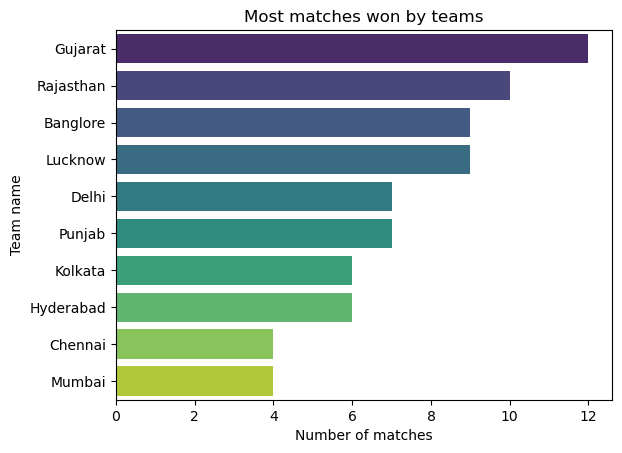

In [37]:
sns.barplot(y = matches.index, x = matches.values, palette = 'viridis')
plt.title('Most matches won by teams')
plt.xlabel('Number of matches')
plt.ylabel('Team name')

Toss decision trends

Text(0, 0.5, 'Count')

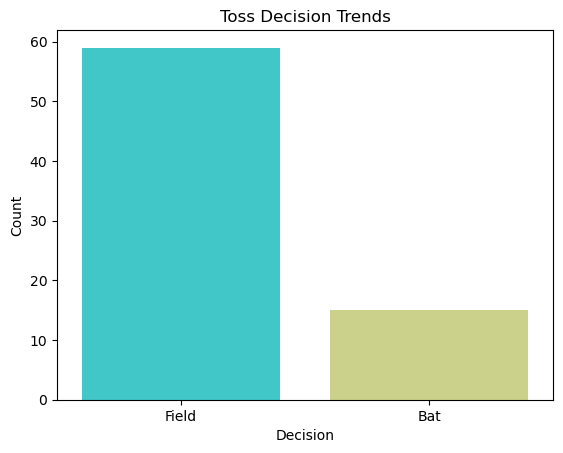

In [44]:
sns.countplot(x = df['toss_decision'], palette='rainbow')
plt.title("Toss Decision Trends")
plt.xlabel("Decision")
plt.ylabel("Count")

Toss winner VS Match winner

In [55]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100)/df.shape[0]
print(f"Percentage of winning matches at winning the toss is: {percentage.round(2)}")

Percentage of winning matches at winning the toss is: 48.65


How do teams won? (Runs vs wickets)

Text(0.5, 0, 'Won By (Wickets or Runs)')

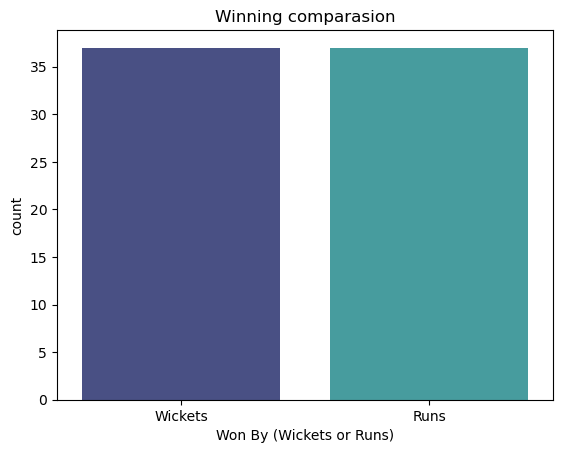

In [79]:
sns.countplot(x = df['won_by'], palette = 'mako')
plt.title("Winning comparasion")
plt.xlabel("Won By (Wickets or Runs)")

### Key Player performances

1. Most man of the match awards

Text(0.5, 0, 'Count')

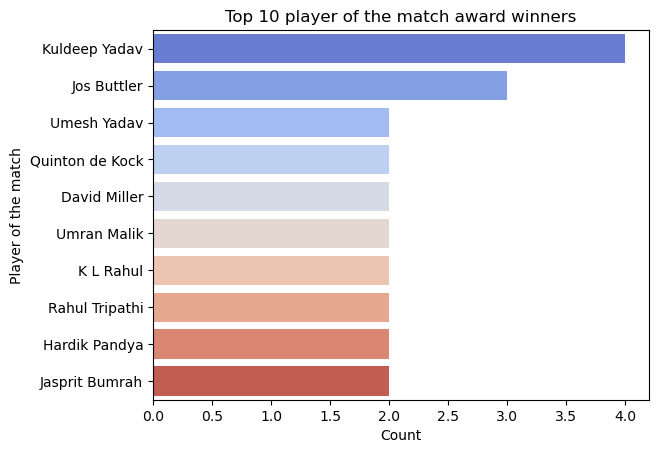

In [80]:
count = df['player_of_the_match'].value_counts().head(10)
sns.barplot(x = count.values, y = count.index, palette = 'coolwarm')
plt.title("Top 10 player of the match award winners")
plt.ylabel("Player of the match")
plt.xlabel("Count")

Top 2 scorers

In [87]:
high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending = False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

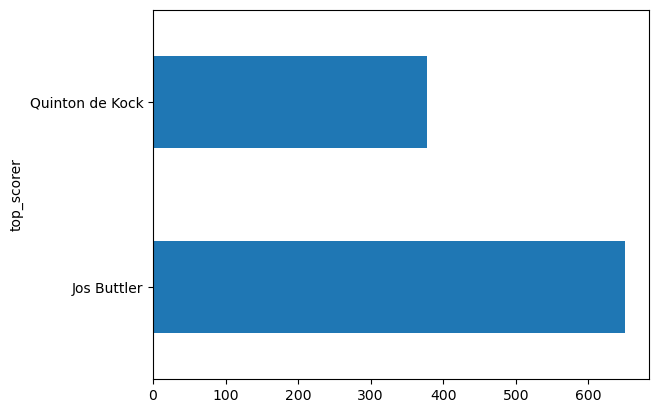

In [93]:
high.plot(kind = 'barh')

Top 10 best bowling figures

In [98]:
df['Highest_wickets'] = df['best_bowling_figure'].apply(lambda x: x.split('--') [0])
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,Highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [104]:
df['Highest_wickets'] = df['Highest_wickets'].astype(int)
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,Highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [106]:
high = df.groupby('best_bowling')['Highest_wickets'].sum().sort_values(ascending=False).head(10)
high

best_bowling
Yuzvendra Chahal     17
Kuldeep Yadav        11
Rashid Khan          11
Jasprit Bumrah       11
Avesh Khan           10
Josh Hazlewood       10
Kagiso Rabada        10
Wanindu Hasaranga     9
Umran Malik           9
T Natarajan           8
Name: Highest_wickets, dtype: int32

<Axes: ylabel='best_bowling'>

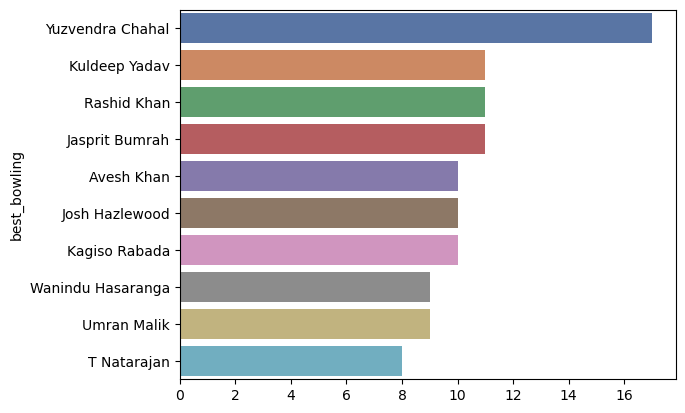

In [114]:
sns.barplot(x = high.values, y = high.index, palette = 'deep')

### Venue analysis

<Axes: ylabel='venue'>

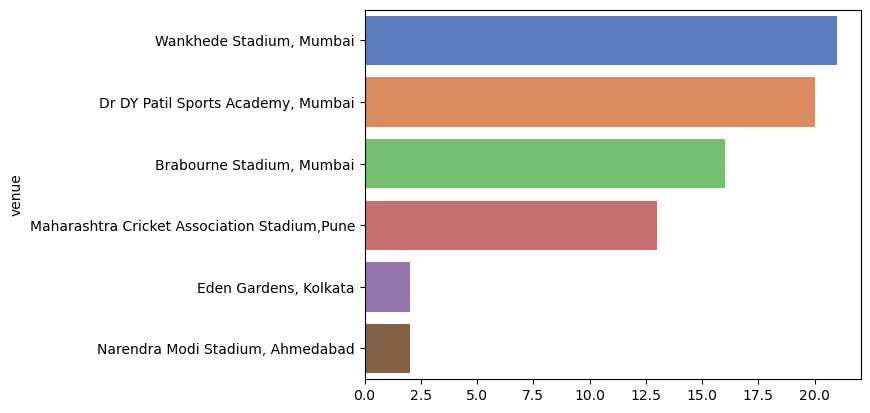

In [123]:
Venues = df['venue'].value_counts()
sns.barplot(x = Venues.values, y = Venues.index, palette = 'muted')

## Custom Questions

Which team won by the highest margin of runs?

In [138]:
df[df['won_by'] == 'Runs'][['match_winner','margin']].sort_values(by = 'margin', ascending=False).head(1)

,match_winner,margin
54,Chennai,91


Which Player has the highest individual score?

In [143]:
df[['top_scorer', 'highscore']].sort_values(by = 'highscore',ascending=  False).head(1)

,top_scorer,highscore
65,Quinton de Kock,140


Which player has the best bowling figure?

In [154]:
dff = df[['best_bowling', 'best_bowling_figure', 'Highest_wickets']].sort_values(by = 'best_bowling_figure', ascending=False).head(4)
dff

,best_bowling,best_bowling_figure,Highest_wickets
29,Yuzvendra Chahal,5--40,5
39,Umran Malik,5--25,5
53,Wanindu Hasaranga,5--18,5
55,Jasprit Bumrah,5--10,5


In [155]:
dff.sort_values(by = 'best_bowling_figure')

,best_bowling,best_bowling_figure,Highest_wickets
55,Jasprit Bumrah,5--10,5
53,Wanindu Hasaranga,5--18,5
39,Umran Malik,5--25,5
29,Yuzvendra Chahal,5--40,5


## **Created By:** *Hafiz Muhammad Talal*